In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import random
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from itertools import product
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import math
import re
import cv2
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from scripts.visualization_helpers import *

In [7]:
PROPOSAL_ID = "1386"
STATE = "train"
injected =  glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/{STATE}/{PROPOSAL_ID}/injections/*fc*.npy')
not_injected =  glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/{STATE}/{PROPOSAL_ID}/injections/**.npy')
not_injected = list(set(not_injected) - set(injected))
print(len(injected))
print(len(not_injected))

610610
577092


In [8]:
not_injected

['/data/scratch/bariskurtkaya/dataset/NIRCAM/train/1386/injections/jw01386-a3001_t003_nircam_f250m-maskrnd-sub320a335r-psf28-aug-rot2-flip0-vshift0-hshift0-vshiftp5-hshiftp7.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/train/1386/injections/jw01386-a3001_t004_nircam_f250m-maskrnd-sub320a335r-psf17-aug-rot0-flip0-vshift0-hshift2-vshiftp8-hshiftp7.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/train/1386/injections/jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-psf336-aug-rot1-flip0-vshift1-hshift1-vshiftp9-hshiftp4.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/train/1386/injections/jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-psf331-aug-rot2-flip0-vshift2-hshift2-vshiftp6-hshiftp7.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/train/1386/injections/jw01386-a3001_t004_nircam_f300m-maskrnd-sub320a335r-psf304-aug-rot0-flip0-vshift2-hshift0-vshiftp1-hshiftp2.npy',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/train/1386/injections/jw01386-a3001_t004_nircam_f300

In [ ]:
injected =  glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/train/train_test/injections/*fc*.npy')
not_injected =  glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/train/train_test/injections/*[!fc]*.npy')

In [ ]:
print(len(injected))

In [ ]:
print(len(not_injected))

In [ ]:
#train_arrays = glob.glob(f'/data/scratch/bariskurtkaya/dataset/NIRCAM/{STATE}/{PROPOSAL_ID}/injections//*fc*.npy')[25:50]

In [ ]:
import torch
sample_count = 10e+3
flux_coef = torch.arange(sample_count) / sample_count # 0 - 1 normalized 10.000 samples
flux_coef = flux_coef * (10e-4 - 10e-10) + 10e-10
flux_coef = flux_coef.cpu().numpy()

In [ ]:
len(flux_coef)

In [9]:
main_dir = "/data/scratch/bariskurtkaya/dataset/NIRCAM/test/*"
main_total = 0

for pid_dir in glob.glob(main_dir):
    sub_dir = f"{pid_dir}/mastDownload/JWST/*psfstack*"
    total_psf = 0
    for psfs_dir in glob.glob(sub_dir):
        total_psf += fits.open(psfs_dir)[1].data.shape[0]
    if total_psf != 0:
        print(pid_dir.split('/')[-1], total_psf)

    main_total += total_psf

4454 560
4451 410


In [4]:
1412 690
1194 45
1193 675
4558 1512
1386 610
1441 669
2278 53

4454 560
4451 410

0

In [ ]:
locations        = get_psf_info(train_arrays, '1386', 'train')
info             = get_augmentation_info(train_arrays)
transformed_list = do_transformations(info, locations)
arrays           = get_array(train_arrays)

In [ ]:
bs = 5
nrows = 5
fig, axes = plt.subplots(nrows=nrows,ncols=bs,figsize=(15,15))
distances = []
step = 20*0.06259530358142339
step = round(step,2)
labels = step*np.array([-2., -1., 0., 1., 2.])
axis_points = np.linspace(0,80,5)

for i, (row,col) in enumerate(product(range(nrows),range(bs))):

    idx_x  = train_arrays[i].rfind('x')

    if idx_x == -1:
        x, y = 0, 0
    else:
        x = int(train_arrays[i][idx_x+1:idx_x+3])
        y = int(train_arrays[i][idx_x+5:idx_x+7])

    #x, y = int(train_arrays[i].split('/')[-1].split('-')[-3:-1][0][1:]), int(train_arrays[i].split('/')[-1].split('-')[-3:-1][1][1:])
    axes[row][col].imshow(arrays[i], interpolation='nearest', cmap='Greys_r')

    if col == 0:
        axes[row][col].set_yticks(axis_points,labels, fontsize=10, rotation=0)
        axes[row][col].set_ylabel('DEC(arcsec)', fontsize=10)
        
        if row == 4:
            axes[row][col].set_xticks(axis_points,labels, fontsize=10, rotation=0)
            axes[row][col].set_xlabel('RA(arcsec)', fontsize=10)

        else:
            axes[row][col].set_xticks([])

    elif row == 4:
        axes[row][col].set_xticks(axis_points,labels, fontsize=10, rotation=0)
        axes[row][col].set_xlabel('arcsec', fontsize=10)
        axes[row][col].set_yticks([])

    else:
        axes[row][col].set_yticks([])
        axes[row][col].set_xticks([])


    #axes[row][col].text(x, y, s="\u25CF", fontsize=12, color='red', alpha=.3, ha='center', va='center')#u"\u2734"
    axes[row][col].invert_yaxis()

    if int(transformed_list[i][0]) == -1:
        pass
    else:
        pass
        #axes[row][col].text(int(transformed_list[i][0]), int(transformed_list[i][1]) , s="\u2605", fontsize=30, color='green', ha='center', va='center')

    distance = calculate_distance(x1=x,x2=int(transformed_list[i][0]), y1=y,y2=int(transformed_list[i][1]))
    distances.append(distance)
    print("Distance:",distance)
    
plt.subplots_adjust(wspace=.12,hspace=.12)
#plt.savefig('figure.jpg',format='jpg', dpi=300, bbox_inches='tight', pad_inches=.1)
plt.show()

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [31]:
sample_count = 10e+3
flux_coef = torch.arange(sample_count) / sample_count # 0 - 1 normalized 10e+4 samples
flux_coef = flux_coef * (10e-4 - 10e-10) + 10e-10

In [32]:
flux_coef[0] , flux_coef[-1]

(tensor(1.0000e-09), tensor(0.0010))

In [3]:
num_rand_flux = 10**4

flux_coef = torch.randint(num_rand_flux, (num_rand_flux,))

(array([1., 0., 2., ..., 0., 1., 4.]),
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
        9.999e+03]),
 <BarContainer object of 9999 artists>)

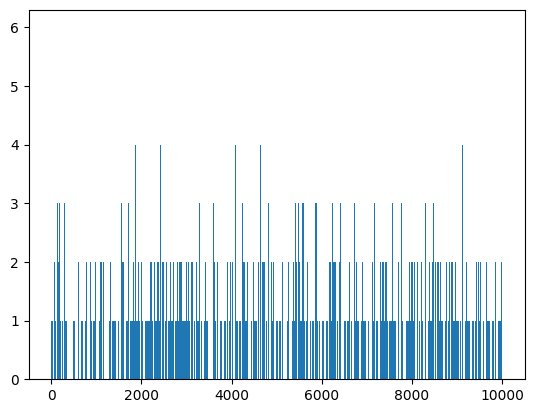

In [15]:
flux_coef.cpu().numpy()
counts, bins = np.histogram(flux_coef, bins=torch.arange(num_rand_flux))
plt.hist(bins[:-1], bins, weights=counts)
